# Python file for training FNO

In [1]:
import random
import torch
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
from timeit import default_timer

sys.path.append('../')
from models import FNN1d, FNN1d_train
prefix = "/central/groups/esm/dzhuang/cost-accuracy-data/"


# Darcy equation solver
$$-\nabla (a \nabla u) = f$$

In [2]:
darcy_as = np.load(prefix+"darcy_a.npy")
darcy_us_ref = np.load(prefix+"darcy_u.npy")


In [4]:
torch.manual_seed(0)
np.random.seed(0)

downsample_ratio = 1

L, Ne_ref = 1.0, 2**12
Ne = Ne_ref//downsample_ratio

grid = np.linspace(0, L, Ne+1)
M = 2**15
n_train = n_test = 2**14
x_train = torch.from_numpy(np.stack((darcy_as[0:n_train, 0::downsample_ratio], np.tile(grid, (n_train,1))), axis=-1).astype(np.float32))
y_train = torch.from_numpy(darcy_us_ref[0:n_train, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_train, y_train are [n_data, n_x, n_channel] arrays
x_test = torch.from_numpy(np.stack((darcy_as[M//2:M//2+n_test, 0::downsample_ratio], np.tile(grid, (n_test,1))), axis=-1).astype(np.float32))
y_test = torch.from_numpy(darcy_us_ref[M//2:M//2+n_test, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_test, y_test are [n_data, n_x, n_channel] arrays


n_fno_layers = 3
k_max = 32
d_f = 32
# fourier k_max
modes = [k_max] * n_fno_layers
# channel d_f
layers = [d_f] * (n_fno_layers + 1)
fc_dim = d_f
in_dim = 2
out_dim = 1
act = "gelu"
pad_ratio = 0.05

base_lr = 0.001
epochs = 11
milestones = [200, 300, 400, 500, 800,900]
scheduler_gamma = 0.5
batch_size=32
normalization = True
dim = []

config = {"model" : {"modes": modes, "fc_dim": fc_dim, "layers": layers, "in_dim": in_dim, "out_dim":out_dim, "act": act, "pad_ratio":pad_ratio},
          "train" : {"base_lr": base_lr, "epochs": epochs, "milestones": milestones, "scheduler_gamma": scheduler_gamma, "batch_size": batch_size, 
                    "normalization": normalization, "dim": dim}}

start = default_timer()
train_rel_l2_losses, test_rel_l2_losses, test_l2_losses, cost = FNN1d_train(x_train, y_train, x_test, y_test, config, save_model_name=prefix+"models/darcy_FNO")
end = default_timer()
print("epochs = ", epochs, "elapsed time = ", end - start)

Epoch :  0  Rel. Train L2 Loss :  0.1476301160582807  Rel. Test L2 Loss :  0.03670573808631161  Test L2 Loss :  0.1326889921037946
Epoch :  10  Rel. Train L2 Loss :  0.01167851842546952  Rel. Test L2 Loss :  0.010566048879809387  Test L2 Loss :  0.03954440551751759
epochs =  11 elapsed time =  181.13013621466234


In [13]:
torch.manual_seed(0)
np.random.seed(0)

downsample_ratio = 1

L, Ne_ref = 1.0, 2**12
Ne = Ne_ref//downsample_ratio

grid = np.linspace(0, L, Ne+1)
M = 2**15
n_train = n_test = 2**13
x_train = torch.from_numpy(np.stack((darcy_as[0:n_train, 0::downsample_ratio], np.tile(grid, (n_train,1))), axis=-1).astype(np.float32))
y_train = torch.from_numpy(darcy_us_ref[0:n_train, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_train, y_train are [n_data, n_x, n_channel] arrays
x_test = torch.from_numpy(np.stack((darcy_as[M//2:M//2+n_test, 0::downsample_ratio], np.tile(grid, (n_test,1))), axis=-1).astype(np.float32))
y_test = torch.from_numpy(darcy_us_ref[M//2:M//2+n_test, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_test, y_test are [n_data, n_x, n_channel] arrays


n_fno_layers = 6
k_max = 128
d_f = 128
# fourier k_max
modes = [k_max] * n_fno_layers
# channel d_f
layers = [d_f] * (n_fno_layers + 1)
fc_dim = d_f
in_dim = 2
out_dim = 1
act = "gelu"
pad_ratio = 0.05

base_lr = 0.001
epochs = 11
milestones = [200, 300, 400, 500, 800,900]
scheduler_gamma = 0.5
batch_size=32
normalization = True
dim = []

config = {"model" : {"modes": modes, "fc_dim": fc_dim, "layers": layers, "in_dim": in_dim, "out_dim":out_dim, "act": act, "pad_ratio":pad_ratio},
          "train" : {"base_lr": base_lr, "epochs": epochs, "milestones": milestones, "scheduler_gamma": scheduler_gamma, "batch_size": batch_size, 
                    "normalization": normalization, "dim": dim}}

start = default_timer()
train_rel_l2_losses, test_rel_l2_losses, test_l2_losses, cost = FNN1d_train(x_train, y_train, x_test, y_test, config, save_model_name=prefix+"models/darcy_FNO")
end = default_timer()
print("epochs = ", epochs, "elapsed time = ", end - start)

Epoch :  0  Rel. Train L2 Loss :  0.14040614537952933  Rel. Test L2 Loss :  0.056555189803475514  Test L2 Loss :  0.21334419591585174
Epoch :  10  Rel. Train L2 Loss :  0.018617707890371094  Rel. Test L2 Loss :  0.025725485324073816  Test L2 Loss :  0.07820896364864893
epochs =  11 elapsed time =  506.9702727040276


In [ ]:
Ne_ref = 2**12
n_train = n_test = 2**14
n_fno_layers = 6
k_max = 128
d_f = 128
epochs =  11 elapsed time =  1022.8753047250211

Ne_ref = 2**12
n_train = n_test = 2**13
n_fno_layers = 6
k_max = 128
d_f = 128
epochs =  11 elapsed time =  509.5362855917774


Ne_ref = 2**12
n_train = n_test = 2**13
n_fno_layers = 3
k_max = 32
d_f = 32
epochs =  11 elapsed time =  88

Ne_ref = 2**12
n_train = n_test = 2**13
n_fno_layers = 3
k_max = 128
d_f = 128
epochs =  11 elapsed time =  281.1660668849945

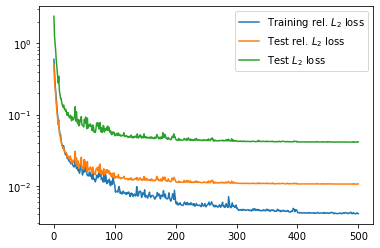

In [20]:
n = len(train_rel_l2_losses)
plt.plot(np.arange(n), train_rel_l2_losses, label=r"Training rel. $L_2$ loss")
plt.plot(np.arange(n), test_rel_l2_losses, label=r"Test rel. $L_2$ loss")
plt.semilogy(np.arange(n), test_l2_losses, label=r"Test $L_2$ loss")
plt.legend()

# Heat equation
$$
u_t - \triangle u = f
$$

In [2]:
heat_u0s    = np.load(prefix+"heat_u0.npy")
heat_fs     = np.load(prefix+"heat_f.npy")
heat_us_ref = np.load(prefix+"heat_u.npy")


In [18]:
torch.manual_seed(0)
np.random.seed(0)


downsample_ratio = 1

L, Ne_ref = 1.0, 2**12
Ne = Ne_ref//downsample_ratio

grid = np.linspace(0, L, Ne+1)
M = 2**15
n_train = n_test = 2**10
x_train = torch.from_numpy(np.stack((heat_u0s[0:n_train, 0::downsample_ratio], heat_fs[0:n_train, 0::downsample_ratio], np.tile(grid, (n_train,1))), axis=-1).astype(np.float32))
y_train = torch.from_numpy(heat_us_ref[0:n_train, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_train, y_train are [n_data, n_x, n_channel] arrays
x_test = torch.from_numpy(np.stack((heat_u0s[M//2:M//2+n_test, 0::downsample_ratio], heat_fs[M//2:M//2+n_test, 0::downsample_ratio], np.tile(grid, (n_test,1))), axis=-1).astype(np.float32))
y_test = torch.from_numpy(heat_us_ref[M//2:M//2+n_test, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_test, y_test are [n_data, n_x, n_channel] arrays


n_fno_layers = 3
k_max = 128
d_f = 128
# fourier k_max
modes = [k_max] * n_fno_layers
# channel d_f
layers = [d_f] * (n_fno_layers + 1)
fc_dim = d_f
in_dim = 3
out_dim = 1
act = "gelu"
pad_ratio = 0.05

base_lr = 0.001
epochs = 1001
milestones = [200, 300, 400, 500, 800,900]
scheduler_gamma = 0.5
batch_size=32
normalization = True
dim = []

config = {"model" : {"modes": modes, "fc_dim": fc_dim, "layers": layers, "in_dim": in_dim, "out_dim":out_dim, "act": act, "pad_ratio":pad_ratio},
          "train" : {"base_lr": base_lr, "epochs": epochs, "milestones": milestones, "scheduler_gamma": scheduler_gamma, "batch_size": batch_size, 
                    "normalization": normalization, "dim": dim}}

train_rel_l2_losses, test_rel_l2_losses, test_l2_losses, cost = FNN1d_train(x_train, y_train, x_test, y_test, config, save_model_name=prefix+"models/test")

Epoch :  0  Rel. Train L2 Loss :  0.856382217258215  Rel. Test L2 Loss :  0.42145340237766504  Test L2 Loss :  0.013766690710326657
Epoch :  10  Rel. Train L2 Loss :  0.10069461376406252  Rel. Test L2 Loss :  0.14603036059997976  Test L2 Loss :  0.00425791964516975
Epoch :  20  Rel. Train L2 Loss :  0.09720877592917532  Rel. Test L2 Loss :  0.09803374879993498  Test L2 Loss :  0.0033720946448738687
Epoch :  30  Rel. Train L2 Loss :  0.07493615138810128  Rel. Test L2 Loss :  0.10992885567247868  Test L2 Loss :  0.0025477786766714416
Epoch :  40  Rel. Train L2 Loss :  0.06044385093264282  Rel. Test L2 Loss :  0.06221187219489366  Test L2 Loss :  0.002013795372477034
Epoch :  50  Rel. Train L2 Loss :  0.07048260036390275  Rel. Test L2 Loss :  0.0632499074563384  Test L2 Loss :  0.0014643911890743766
Epoch :  60  Rel. Train L2 Loss :  0.05660118453670293  Rel. Test L2 Loss :  0.044763920130208135  Test L2 Loss :  0.0012948850999237038
Epoch :  70  Rel. Train L2 Loss :  0.03958965907804668 

In [ ]:
k_max = 32
d_f = 32
Epoch :  1000  Rel. Train L2 Loss :  0.002646285909577273  Rel. Test L2 Loss :  0.005841498059453443  Test L2 Loss :  0.00019765041542996187

k_max = 128
d_f = 128
Epoch :  1000  Rel. Train L2 Loss :  0.0005942718698861427  Rel. Test L2 Loss :  0.01795133063569665  Test L2 Loss :  0.00032980215746647445
                
                
Epoch :  1000  Rel. Train L2 Loss :  0.0035736724239541218  Rel. Test L2 Loss :  0.00750352768227458  Test L2 Loss :  0.0002495344524504617

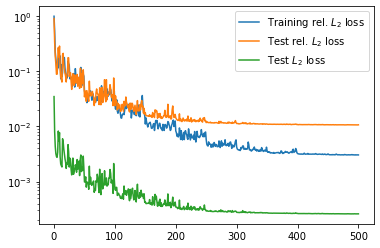

In [34]:
n = len(train_rel_l2_losses)
plt.plot(np.arange(n), train_rel_l2_losses, label=r"Training rel. $L_2$ loss")
plt.plot(np.arange(n), test_rel_l2_losses, label=r"Test rel. $L_2$ loss")
plt.semilogy(np.arange(n), test_l2_losses, label=r"Test $L_2$ loss")
plt.legend()

In [29]:
n

2001